In [20]:
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import ast

from scipy.interpolate import make_interp_spline

%matplotlib inline

In [6]:
speeches = pd.read_csv("../data/cleaned_speeches.csv", sep='\t', index_col=0)

In [7]:
speeches.tail()

,Unnamed: 0.1,year,speaker,speech,n_words
443,40,1394,موحدی,"['خطب', 'موقت', 'نماز', 'جمعه', 'تهران', 'بان'...",1266
444,41,1394,صدیقی,"['خطب', 'نماز', 'جمعه', 'تهران', 'تصرح', 'کرد'...",1341
445,42,1394,صدیقی,"['خطب', 'نماز', 'جمعه', 'ان', 'هفته', 'تهران',...",1630
446,43,1394,جنتی,"['آت', 'الله', 'احمد', 'جنت', 'گفت:', 'باد', '...",1256
447,44,1394,موحدی,"['آت', 'الله', 'موحد', 'کرمان', 'تأکد', 'انکه'...",1050


In [60]:
def count_instances(df, word):
    counter = 0
    n_words_mean = df['n_words'].mean()
    for i in range(len(df)):
        row = df.iloc[i]
        for w in ast.literal_eval(row['speech']):
            if word in w:
                counter = counter + 1
    return counter/n_words_mean*1000

In [61]:
YEARS = list(range(1378, 1381)) + list(range(1392, 1399)) + [1400]

In [62]:
years_g = list(range(1389,1401))
years_g.remove(1399)

In [63]:
def annual_freq(word):
    freqs = []
    for year in YEARS:
        word_count = count_instances(speeches[speeches['year']==year], word)
        freqs.append(word_count / len(speeches[speeches['year']==year]))
    
    return freqs

In [64]:
annual_freq('خامنه')

[0.042365252020292954,
 0.026167164569659174,
 0.013945380592678676,
 0.052132207277656134,
 0.050586806960744635,
 0.0,
 0.08165264962848046,
 0.16043638697256538,
 0.0,
 0.4682183770510566,
 0.06089392278650591]

In [65]:
def categorical_freqs(category_w):
    all_freqs = [0] * len(YEARS)
    for w in category_w:
        single_w_freqs = annual_freq(w)
        for i, f in enumerate(single_w_freqs):
            all_freqs[i] = all_freqs[i] + f
    
    for i, _ in enumerate(all_freqs):
            all_freqs[i] = all_freqs[i] / len(category_w)
            
    return all_freqs

In [66]:
def plot_freqs(title, freqs):
    X_Y_Spline = make_interp_spline(years_g, freqs)
    X_ = np.linspace(years_g[0], years_g[-1], 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_)
    plt.axvline(x=1392, linestyle='dotted', label='Election')
    plt.axvline(x=1396, linestyle='dotted')
    plt.axvline(x=1400, linestyle='dotted')
    plt.title(title)
    plt.xlabel("Years")
    plt.ylabel("Frequency")

In [67]:
economic_w = ['گرانی', 'تورم', 'اقتصاد', 'تحریم' , 'فقر', 'قیمت', 'بورس', 'مالیات']
economic_freqs = categorical_freqs(economic_w)

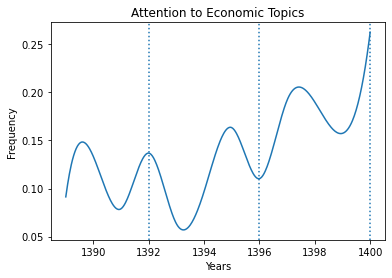

In [68]:
plot_freqs('Attention to Economic Topics', economic_freqs)

In [69]:
unpragmatic_w = ['مقاومتی', 'بانک', 'کفایی', 'مشت', 'دهان', 'شکستن', 'هسته']
unpragmatic_freqs = categorical_freqs(unpragmatic_w)

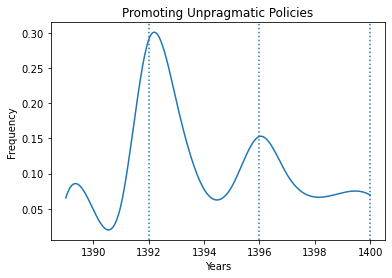

In [70]:
plot_freqs('Promoting Unpragmatic Policies', unpragmatic_freqs)

In [71]:
socialist_w = ['بیمه', 'جهادی', 'طبقات', 'بسیج', 'یارانه', 'کوپن', 'گندم']
socialist_freqs = categorical_freqs(socialist_w)

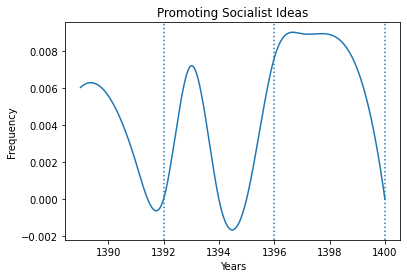

In [72]:
plot_freqs('Promoting Socialist Ideas', socialist_freqs)